<a href="https://colab.research.google.com/github/raquelkimberly/Predccion-de-diabetes/blob/main/Prediccion_de_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediccion de diabetes
Autor: Raquel Kimberly San Martín Saavedra

#Primera opcion de datos

Fuente remota: https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook

Este proyecto es sobre clasificacion de los datos de diabetes

el objetivo es clasificar los encuestados segun los sintomas y las respuestas dadas

El conjunto de datos contiene 21 variables y 253,680 de filas, los retos que se puede presentar es la limpieza de datos o un desbalanceo, tambien buscar el modelo adecuado para estos datos

In [ ]:
import pandas as pd
df= pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#Segunda opcion de datos


predeterminado de los clientes de tarjetas de crédito
Fuente de datos:https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Esta investigación apuntó al caso de los pagos por defecto de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos.

Esta investigación empleó una variable binaria, pago por defecto (Sí = 1, No = 0), como variable de respuesta. Este estudio revisó la literatura y utilizó las siguientes 23 variables como variables explicativas con 30000 filas en esta base de datos hay retos en buscar le modelo que se utilizaria

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df= pd.read_excel('/content/default of credit card clients.xls',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Decidimos agarrar esta base de datos 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
df=df.drop(['ID'], axis=1)

In [5]:
df.duplicated().sum()

35

In [6]:
df= df.drop_duplicates()

No tenemos valores cualitativos por eso no se ve ninguna inconsistencia

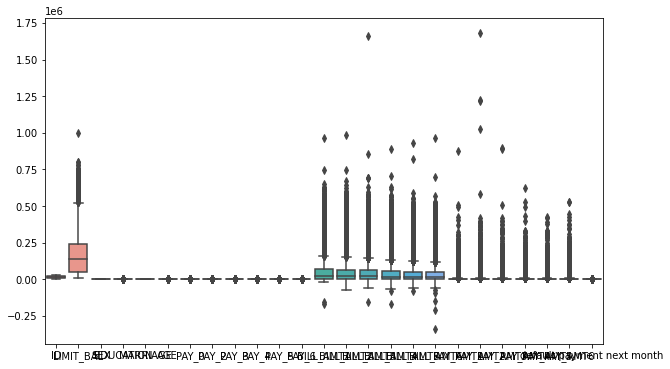

In [8]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

Encontramos varios variables con outlier que debemos analizar 

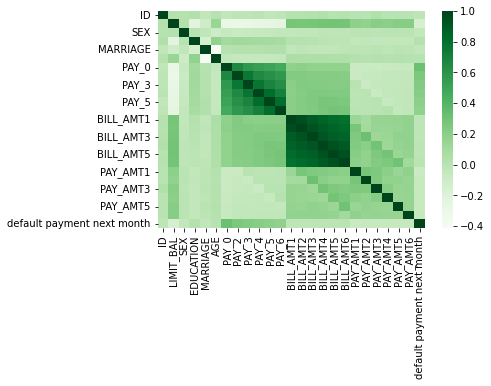

In [10]:
corr=df.corr()
sns.heatmap(corr, cmap = 'Greens')

Se puede ver que los tonos de los verdes los mas claros y oscuros tenemos los PAY y sex